In [1]:
import os
try:
    path_initialized
except NameError:
    os.chdir('..')
    path_initialized = True

import networkx as nx

from swiper2.schedule_experiments import *
from swiper2.device_manager import DeviceManager
import swiper2.plot as plotter
from swiper2.lattice_surgery_schedule import LatticeSurgerySchedule

In [2]:
msd = MSD15To1Schedule()

In [3]:
msd_dm = DeviceManager(7, msd.schedule)

In [4]:
msd_dm._predict_instruction_start_times()

({0: 0,
  1: 7,
  2: 7,
  3: 14,
  4: 14,
  5: 21,
  6: 21,
  7: 28,
  8: 28,
  9: 35,
  21: 0,
  25: 35,
  26: 35,
  27: 35,
  28: 35,
  29: 35,
  30: 35,
  31: 35,
  32: 21,
  33: 28,
  34: 28,
  35: 28,
  36: 7,
  37: 14,
  38: 21,
  39: 28,
  40: 42,
  41: 42,
  42: 42,
  43: 42,
  44: 42,
  45: 42,
  46: 42,
  47: 28,
  48: 35,
  49: 35,
  50: 35,
  51: 14,
  52: 21,
  53: 28,
  54: 35,
  55: 35,
  56: 42,
  57: 49,
  58: 56,
  59: 47,
  60: 47,
  61: 47,
  62: 47,
  63: 47,
  64: 47,
  65: 47,
  66: 63,
  67: 42,
  68: 42,
  69: 42,
  70: 42,
  71: 42,
  72: 42,
  73: 42,
  74: 0,
  75: 33,
  76: 40,
  77: 40,
  78: 40,
  79: 19,
  80: 26,
  81: 33,
  82: 40,
  83: 28,
  84: 35,
  85: 35,
  86: 35,
  87: 14,
  88: 21,
  89: 28,
  90: 35,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  10: 28,
  11: 28,
  12: 28,
  13: 28,
  14: 28,
  15: 28,
  16: 28,
  17: 14,
  18: 21,
  19: 21,
  20: 21,
  22: 7,
  23: 14,
  24: 21},
 {0: 7,
  1: 7,
  2: 14,
  3: 14,


In [5]:
while not msd_dm.is_done():
    print(msd_dm.get_next_round({}))

[SyndromeRound(patch=(0, 0), round=0, instruction_idx=0, is_unwanted_idle=False), SyndromeRound(patch=(0, 1), round=0, instruction_idx=0, is_unwanted_idle=False), SyndromeRound(patch=(0, 2), round=0, instruction_idx=0, is_unwanted_idle=False), SyndromeRound(patch=(0, 3), round=0, instruction_idx=0, is_unwanted_idle=False), SyndromeRound(patch=(2, 0), round=0, instruction_idx=0, is_unwanted_idle=False), SyndromeRound(patch=(2, 1), round=0, instruction_idx=0, is_unwanted_idle=False), SyndromeRound(patch=(2, 2), round=0, instruction_idx=0, is_unwanted_idle=False), SyndromeRound(patch=(2, 4), round=0, instruction_idx=0, is_unwanted_idle=False), SyndromeRound(patch=(1, 0), round=0, instruction_idx=0, is_unwanted_idle=False), SyndromeRound(patch=(1, 1), round=0, instruction_idx=0, is_unwanted_idle=False), SyndromeRound(patch=(1, 2), round=0, instruction_idx=0, is_unwanted_idle=False), SyndromeRound(patch=(1, 3), round=0, instruction_idx=0, is_unwanted_idle=False), SyndromeRound(patch=(1, 4),

In [6]:
msd_dm._predict_instruction_start_times()

({0: 0,
  1: 8,
  2: 7,
  3: 15,
  4: 14,
  5: 22,
  6: 21,
  7: 29,
  8: 28,
  9: 36,
  10: 35,
  11: 35,
  12: 35,
  13: 35,
  14: 35,
  15: 35,
  16: 35,
  17: 14,
  18: 21,
  19: 21,
  20: 21,
  21: 0,
  22: 7,
  23: 14,
  24: 21,
  25: 42,
  26: 42,
  27: 42,
  28: 42,
  29: 42,
  30: 42,
  31: 42,
  32: 21,
  33: 28,
  34: 28,
  35: 28,
  36: 7,
  37: 14,
  38: 21,
  39: 28,
  40: 49,
  41: 49,
  42: 49,
  43: 49,
  44: 49,
  45: 49,
  46: 49,
  47: 28,
  48: 35,
  49: 35,
  50: 35,
  51: 14,
  52: 21,
  53: 28,
  54: 35,
  55: 35,
  56: 42,
  57: 49,
  58: 56,
  59: 55,
  60: 55,
  61: 55,
  62: 55,
  63: 55,
  64: 55,
  65: 55,
  66: 64,
  67: 50,
  68: 50,
  69: 50,
  70: 50,
  71: 50,
  72: 50,
  73: 50,
  74: 36,
  75: 34,
  76: 41,
  77: 41,
  78: 41,
  79: 20,
  80: 27,
  81: 34,
  82: 41,
  83: 29,
  84: 36,
  85: 36,
  86: 36,
  87: 15,
  88: 22,
  89: 29,
  90: 36,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1},
 {0: 7,
  1: 8,
  2: 14,
  3: 15,

In [7]:
msd_dm.get_data()

DeviceData(d=7, num_rounds=63, instructions=[Instruction(name='MERGE', patches=[(0, 0), (0, 1), (0, 2), (0, 3), (2, 0), (2, 1), (2, 2), (2, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[]), Instruction(name='DISCARD', patches=[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)], duration=0, conditioned_on_idx=None, conditional_dependencies=[]), Instruction(name='MERGE', patches=[(0, 0), (0, 1), (0, 4), (0, 5), (2, 0), (2, 1), (2, 3), (2, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[]), Instruction(name='DISCARD', patches=[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5)], duration=0, conditioned_on_idx=None, conditional_dependencies=[]), Instruction(name='MERGE', patches=[(0, 0), (0, 2), (0, 4), (0, 6), (2, 0), (2, 2), (2, 3), (2, 6), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)], duration=<Duration.D_ROUNDS: 2>, cond

In [8]:
msd.schedule.all_instructions

[Instruction(name='MERGE', patches=[(0, 0), (0, 1), (0, 2), (0, 3), (2, 0), (2, 1), (2, 2), (2, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[]),
 Instruction(name='DISCARD', patches=[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)], duration=0, conditioned_on_idx=None, conditional_dependencies=[]),
 Instruction(name='MERGE', patches=[(0, 0), (0, 1), (0, 4), (0, 5), (2, 0), (2, 1), (2, 3), (2, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[]),
 Instruction(name='DISCARD', patches=[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5)], duration=0, conditioned_on_idx=None, conditional_dependencies=[]),
 Instruction(name='MERGE', patches=[(0, 0), (0, 2), (0, 4), (0, 6), (2, 0), (2, 2), (2, 3), (2, 6), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_depende

In [9]:
msd_dm._predict_instruction_start_times()

({0: 0,
  1: 8,
  2: 7,
  3: 15,
  4: 14,
  5: 22,
  6: 21,
  7: 29,
  8: 28,
  9: 36,
  10: 35,
  11: 35,
  12: 35,
  13: 35,
  14: 35,
  15: 35,
  16: 35,
  17: 14,
  18: 21,
  19: 21,
  20: 21,
  21: 0,
  22: 7,
  23: 14,
  24: 21,
  25: 42,
  26: 42,
  27: 42,
  28: 42,
  29: 42,
  30: 42,
  31: 42,
  32: 21,
  33: 28,
  34: 28,
  35: 28,
  36: 7,
  37: 14,
  38: 21,
  39: 28,
  40: 49,
  41: 49,
  42: 49,
  43: 49,
  44: 49,
  45: 49,
  46: 49,
  47: 28,
  48: 35,
  49: 35,
  50: 35,
  51: 14,
  52: 21,
  53: 28,
  54: 35,
  55: 35,
  56: 42,
  57: 49,
  58: 56,
  59: 55,
  60: 55,
  61: 55,
  62: 55,
  63: 55,
  64: 55,
  65: 55,
  66: 64,
  67: 50,
  68: 50,
  69: 50,
  70: 50,
  71: 50,
  72: 50,
  73: 50,
  74: 36,
  75: 34,
  76: 41,
  77: 41,
  78: 41,
  79: 20,
  80: 27,
  81: 34,
  82: 41,
  83: 29,
  84: 36,
  85: 36,
  86: 36,
  87: 15,
  88: 22,
  89: 29,
  90: 36,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1},
 {0: 7,
  1: 8,
  2: 14,
  3: 15,

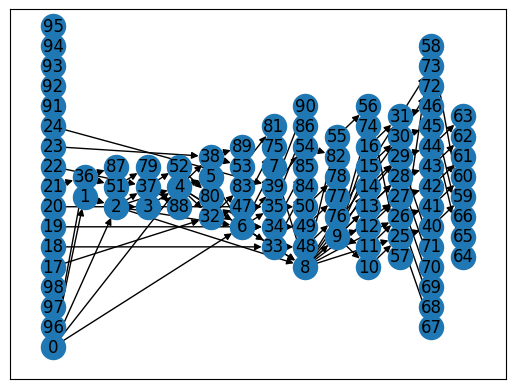

In [10]:
G = msd.schedule.to_dag()

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

nx.draw_networkx(G, pos=pos)

In [11]:
msd_dm.get_data().patches_initialized_by_round

{0: {(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (1, 4),
  (2, 0),
  (2, 1),
  (2, 2),
  (2, 4),
  (3, 4)},
 1: {(4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7)},
 2: set(),
 3: set(),
 4: set(),
 5: set(),
 6: set(),
 7: {(0, 4),
  (0, 5),
  (1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 5),
  (3, 5)},
 8: set(),
 9: set(),
 10: set(),
 11: set(),
 12: set(),
 13: set(),
 14: {(0, 6),
  (1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (2, 6),
  (3, 0),
  (3, 6)},
 15: set(),
 16: set(),
 17: set(),
 18: set(),
 19: set(),
 20: set(),
 21: {(1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (1, 7),
  (2, 7),
  (3, 1),
  (3, 2),
  (3, 3),
  (3, 7)},
 22: set(),
 23: set(),
 24: set(),
 25: set(),
 26: set(),
 27: set(),
 28: {(0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7)},
 29: set(),
 30: set(),
 31: set(),
 32: set(),
 33: set(),
 34: set(),
 3

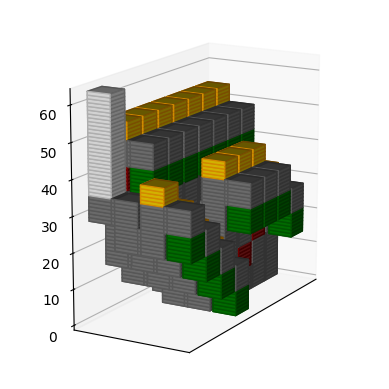

In [12]:
ax = plotter.plot_device_schedule_trace(msd_dm.get_data(), spacing=1)
# ax.invert_yaxis()
ax.view_init(elev=15, azim=30)

In [13]:
# TODO: T injections in column 1 are happening before they should be allowed to

# RegularTSchedule with a delay on the first T injection

In [14]:
regular_t = RegularTSchedule(3, 20)

In [15]:
list(enumerate(regular_t.schedule.all_instructions))

[(0,
  Instruction(name='IDLE', patches=[(0, 0)], duration=20, conditioned_on_idx=None, conditional_dependencies=[])),
 (1,
  Instruction(name='INJECT_T', patches=[(1, 0)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[])),
 (2,
  Instruction(name='MERGE', patches=[(0, 0), (1, 0)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[3])),
 (3,
  Instruction(name='CONDITIONAL_S', patches=[(0, 0)], duration=<Duration.HALF_D_ROUNDS: 1>, conditioned_on_idx=2, conditional_dependencies=[])),
 (4,
  Instruction(name='DISCARD', patches=[(1, 0)], duration=0, conditioned_on_idx=None, conditional_dependencies=[])),
 (5,
  Instruction(name='IDLE', patches=[(0, 0)], duration=20, conditioned_on_idx=None, conditional_dependencies=[])),
 (6,
  Instruction(name='INJECT_T', patches=[(0, 1)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[])),
 (7,
  Instruction(name='MERGE', patches=[(0, 0), (0, 1)

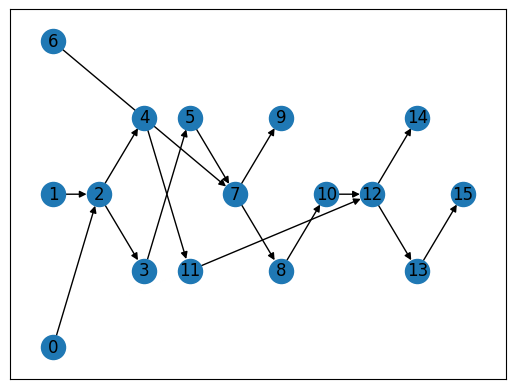

In [16]:
G = regular_t.schedule.to_dag()

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

nx.draw_networkx(G, pos=pos)

In [17]:
regular_t_dm = DeviceManager(7, regular_t.schedule)

In [18]:
for _ in range(40):
    # block first merge
    regular_t_dm.get_next_round({2})
#     print(regular_t_dm._active_patches)

while not regular_t_dm.is_done():
    regular_t_dm.get_next_round({})

In [19]:
regular_t_dm.get_data().generated_syndrome_data

[[SyndromeRound(patch=(0, 0), round=0, instruction_idx=0, is_unwanted_idle=False)],
 [SyndromeRound(patch=(0, 0), round=1, instruction_idx=0, is_unwanted_idle=False)],
 [SyndromeRound(patch=(0, 0), round=2, instruction_idx=0, is_unwanted_idle=False)],
 [SyndromeRound(patch=(0, 0), round=3, instruction_idx=0, is_unwanted_idle=False)],
 [SyndromeRound(patch=(0, 0), round=4, instruction_idx=0, is_unwanted_idle=False)],
 [SyndromeRound(patch=(0, 0), round=5, instruction_idx=0, is_unwanted_idle=False)],
 [SyndromeRound(patch=(0, 0), round=6, instruction_idx=0, is_unwanted_idle=False)],
 [SyndromeRound(patch=(0, 0), round=7, instruction_idx=0, is_unwanted_idle=False)],
 [SyndromeRound(patch=(0, 0), round=8, instruction_idx=0, is_unwanted_idle=False)],
 [SyndromeRound(patch=(0, 0), round=9, instruction_idx=0, is_unwanted_idle=False)],
 [SyndromeRound(patch=(0, 0), round=10, instruction_idx=0, is_unwanted_idle=False)],
 [SyndromeRound(patch=(0, 0), round=11, instruction_idx=0, is_unwanted_idle

<Axes3D: >

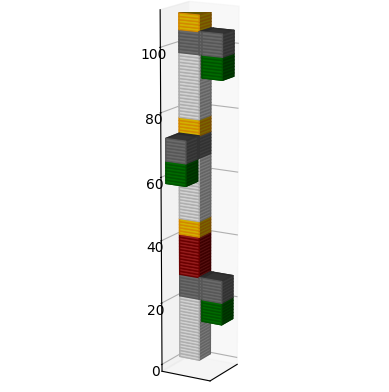

In [20]:
plotter.plot_device_schedule_trace(regular_t_dm.get_data(), spacing=1)